# ***Importing The Libraries***

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/StudentPerformanceFactors.csv")

In [4]:
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [6]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6607.000000,6607.000000,6607.00000,6607.000000,6607.000000,6607.000000,6607.000000
mean,19.975329,79.977448,7.02906,75.070531,1.493719,2.967610,67.235659
std,5.990594,11.547475,1.46812,14.399784,1.230570,1.031231,3.890456
min,1.000000,60.000000,4.00000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.00000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.00000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.00000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.00000,100.000000,8.000000,6.000000,101.000000


# ***Data Cleaning & Preprocessing***

In [7]:
df.isna().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


**Since the percentage of the null is small we can drop them**

In [8]:
df.duplicated().sum()

np.int64(0)

#### ***Handling Missing Values***

In [9]:
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [11]:
df.shape

(6378, 20)

#### ***Data visualization***

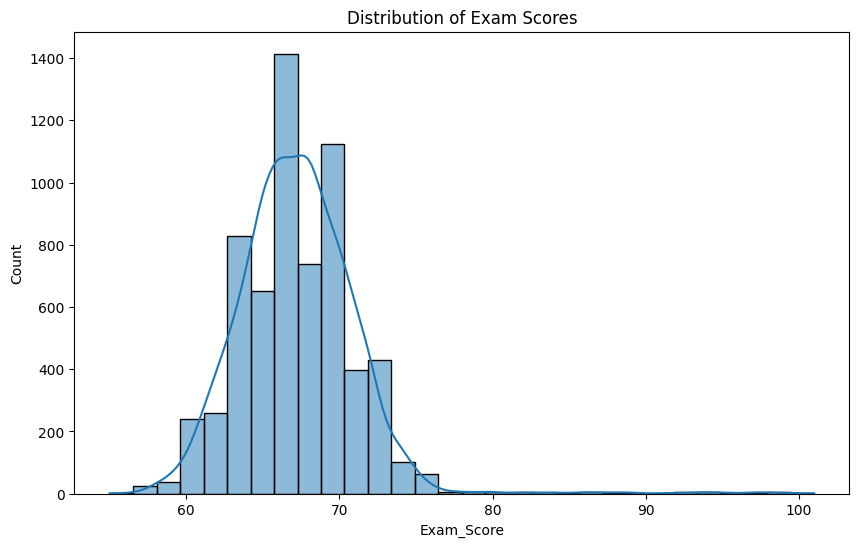

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Exam_Score'], bins=30, kde=True)
plt.title('Distribution of Exam Scores')
plt.show()

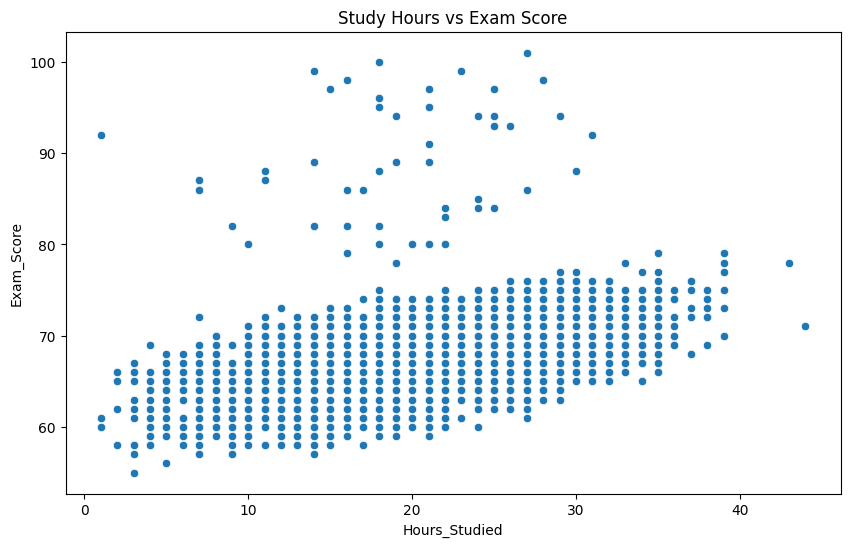

In [13]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Hours_Studied', y='Exam_Score', data=df)
plt.title('Study Hours vs Exam Score')
plt.show()

#### ***Splitting the Columns***

In [14]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
numerical_cols = df.select_dtypes(include=['number']).columns.tolist()
print("Categorical Columns:", len(categorical_cols))
print("Numerical Columns:", len(numerical_cols))

Categorical Columns: 13
Numerical Columns: 7


#### ***Encoding Categorical Columns***

In [15]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1,67
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0,61
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1,74
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1,71
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0,70


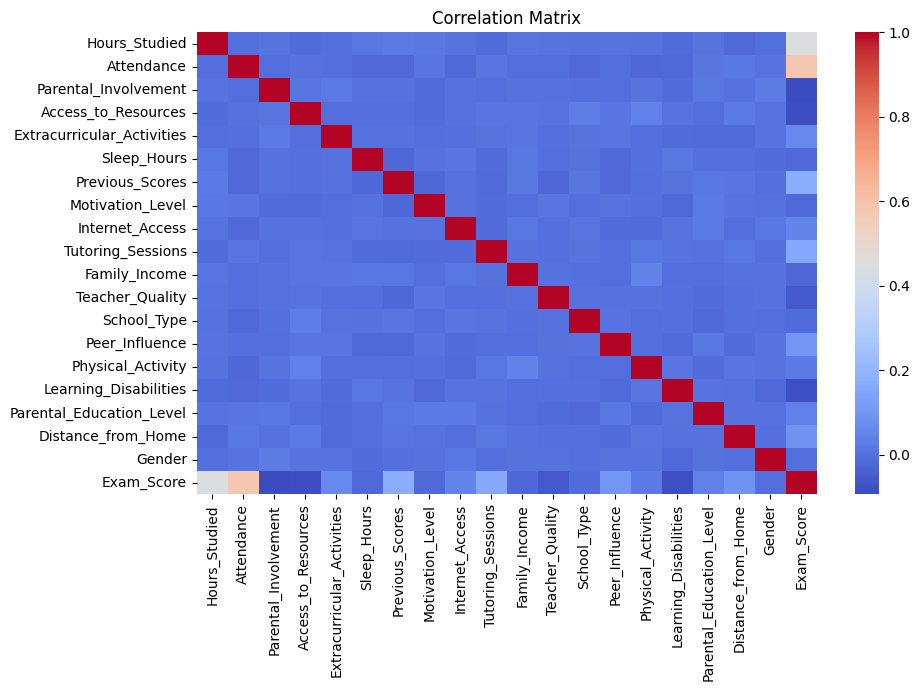

In [16]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

#### ***Handling Outliers***

In [18]:
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

outlier_condition = ((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR)))
outliers_iqr = outlier_condition.any(axis=1)
print(f'Number of outlier rows using IQR: {np.sum(outliers_iqr)}')
data_cleaned = df[~outliers_iqr]
data_cleaned.shape

Number of outlier rows using IQR: 542


(5836, 20)

# ***MODELS***

#### ***MODELS With Outliers***

In [19]:
X_HoursStudiedOnly= df["Hours_Studied"].values.reshape(-1,1)
y_HoursStudiedOnly= df["Exam_Score"].values.reshape(-1,1)

In [20]:
X_trainHoursStudiedOnly, X_testHoursStudiedOnly, y_trainHoursStudiedOnly, y_testHoursStudiedOnly = train_test_split(X_HoursStudiedOnly, y_HoursStudiedOnly, test_size=0.2, random_state=42)

In [21]:
lr = LinearRegression()
lr.fit(X_trainHoursStudiedOnly, y_trainHoursStudiedOnly)

LinearRegression()

In [22]:
y_HoursStudiedOnlyPred = lr.predict(X_testHoursStudiedOnly)
print("Mean Squared Error:", mean_squared_error(y_testHoursStudiedOnly, y_HoursStudiedOnlyPred))
print("R^2 Score:", r2_score(y_testHoursStudiedOnly, y_HoursStudiedOnlyPred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_testHoursStudiedOnly, y_HoursStudiedOnlyPred)))

Mean Squared Error: 12.351733799445535
R^2 Score: 0.2051306083246669
Root Mean Squared Error: 3.5145033503249836


Text(0, 0.5, 'Exam Score')

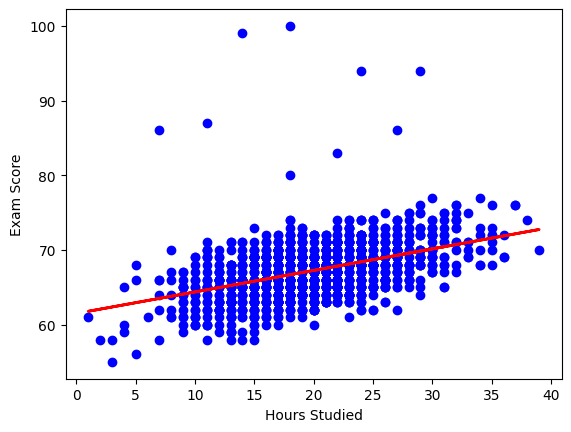

In [23]:
plt.scatter(X_testHoursStudiedOnly, y_testHoursStudiedOnly, color='blue', label='Actual Scores')
plt.plot(X_testHoursStudiedOnly, y_HoursStudiedOnlyPred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Hours Studied')
plt.ylabel('Exam Score')

In [24]:
df_DropedColumns = df.drop(["Extracurricular_Activities", "Parental_Education_Level", "Distance_from_Home", "Gender","Family_Income"], axis=1)

In [25]:
X_DropedColumns  = df_DropedColumns.drop('Exam_Score', axis=1)
y_DropedColumns  = df_DropedColumns['Exam_Score']
X_trainDropedColumns, X_testDropedColumns, y_trainDropedColumns, y_testDropedColumns = train_test_split(X_DropedColumns, y_DropedColumns, test_size=0.2, random_state=42)

In [26]:
lr_model_DroppedColumns = LinearRegression()
lr_model_DroppedColumns.fit(X_trainDropedColumns, y_trainDropedColumns)

LinearRegression()

In [27]:
y_DropedColumnsPred = lr_model_DroppedColumns.predict(X_testDropedColumns)
print("Mean Squared Error (Dropped Columns):", mean_squared_error(y_testDropedColumns, y_DropedColumnsPred))
print("R^2 Score (Dropped Columns):", r2_score(y_testDropedColumns, y_DropedColumnsPred))
print("Root Mean Squared Error (Dropped Columns):", np.sqrt(mean_squared_error(y_testDropedColumns, y_DropedColumnsPred)))


Mean Squared Error (Dropped Columns): 5.429311265457468
R^2 Score (Dropped Columns): 0.6506082941178724
Root Mean Squared Error (Dropped Columns): 2.3300882527186535


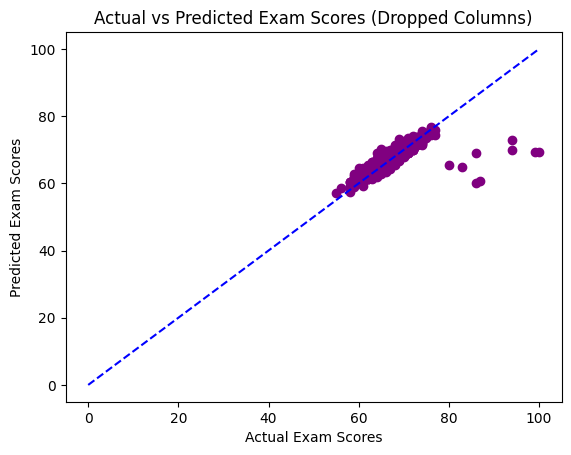

In [28]:
plt.scatter(y_testDropedColumns, y_DropedColumnsPred, color='purple')
plt.plot([0, 100], [0, 100], color="blue",linestyle='--')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores (Dropped Columns)')
plt.show()

In [29]:
X = df.drop('Exam_Score', axis=1)
y = df['Exam_Score']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)


LinearRegression()

In [31]:
y_pred = lr_model.predict(X_test)
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R^2 Score:", r2_score(y_test, y_pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_test, y_pred)))


Mean Squared Error: 5.215195379547097
R^2 Score: 0.6643872636734858
Root Mean Squared Error: 2.283680227078016


In [32]:
dfnew = pd.DataFrame({"Y test" : y_test, "Y predict" : y_pred})
dfnew.head(10)

,Y test,Y predict
2814,74,73.372647
4421,66,65.489406
4282,70,70.507145
1246,72,70.393077
4699,67,67.253288
235,69,70.849810
1679,72,71.534032
300,66,65.426049
5600,69,66.844387
5444,68,66.945441


Text(0, 0.5, 'Predicted Scores')

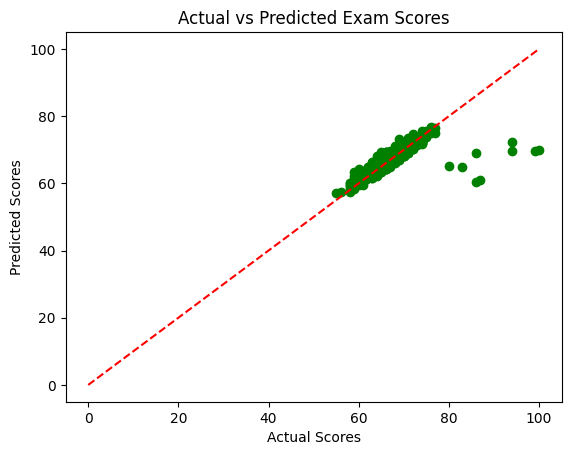

In [33]:
plt.scatter(y_test, y_pred, color='green')
plt.plot([0, 100], [0, 100], color='red', linestyle='--')
plt.title('Actual vs Predicted Exam Scores')
plt.xlabel('Actual Scores')
plt.ylabel('Predicted Scores')

#### ***Models Without Outliers***

In [34]:
X_New = data_cleaned.drop('Exam_Score', axis=1)
y_New = data_cleaned['Exam_Score']

In [35]:
X_New_train, X_New_test, y_New_train, y_New_test = train_test_split(X_New, y_New, test_size=0.2, random_state=42)


In [36]:
lr_model_New = LinearRegression()
lr_model_New.fit(X_New_train, y_New_train)

LinearRegression()

In [37]:
y_NewPred = lr_model_New.predict(X_New_test)
print("Mean Squared Error:", mean_squared_error(y_New_test, y_NewPred))
print("R^2 Score:", r2_score(y_New_test, y_NewPred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(y_New_test, y_NewPred)))

Mean Squared Error: 1.2026032753209686
R^2 Score: 0.8792451190287593
Root Mean Squared Error: 1.0966326984551247


In [38]:
dfnew = pd.DataFrame({"Y test" : y_New_test, "Y predict" : y_NewPred})
dfnew.head(10)

,Y test,Y predict
3749,66,66.648250
6158,68,68.407195
3037,69,70.103948
1745,60,61.779770
4742,65,65.273595
5559,71,71.194359
1691,69,67.716742
3411,67,66.066700
4894,64,63.687505
6434,65,65.889744


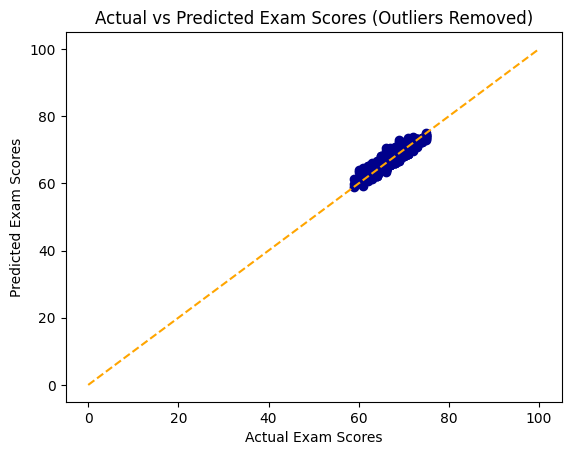

In [39]:
plt.scatter(y_New_test, y_NewPred, color='darkblue')
plt.plot([0, 100], [0, 100], color='orange', linestyle='--')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores (Outliers Removed)')
plt.show()

#### ***PolynomialFeatuers Model***

In [40]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_New)
X_poly_train, X_poly_test, y_poly_train, y_poly_test = train_test_split(X_poly, y_New, test_size=0.2, random_state=42)

In [41]:
model = LinearRegression()
model.fit(X_poly_train, y_poly_train)

LinearRegression()

In [42]:
model_pred = model.predict(X_poly_test)
print("Mean Squared Error (Polynomial):", mean_squared_error(y_poly_test, model_pred))
print("R^2 Score (Polynomial):", r2_score(y_poly_test, model_pred))
print("Root Mean Squared Error (Polynomial):", np.sqrt(mean_squared_error(y_poly_test, model_pred)))

Mean Squared Error (Polynomial): 0.10035287717880068
R^2 Score (Polynomial): 0.9899234435931389
Root Mean Squared Error (Polynomial): 0.31678522247541896


In [43]:
dfnew = pd.DataFrame({"Y test" : y_poly_test, "Y predict" : model_pred})
dfnew.head(10)

,Y test,Y predict
3749,66,65.976306
6158,68,68.504829
3037,69,68.997163
1745,60,60.140545
4742,65,65.262394
5559,71,71.402728
1691,69,69.381058
3411,67,67.011404
4894,64,64.201467
6434,65,65.195137


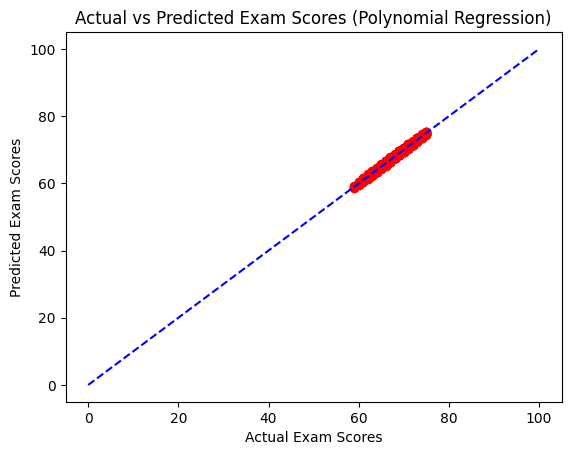

In [44]:
plt.scatter(y_poly_test, model_pred, color='red')
plt.plot([0, 100], [0, 100], color='blue', linestyle='--')
plt.xlabel('Actual Exam Scores')
plt.ylabel('Predicted Exam Scores')
plt.title('Actual vs Predicted Exam Scores (Polynomial Regression)')
plt.show()